In [2]:
# Kennedi Todd
# July 31, 2024
# Linear regression, supervised learning
# Predict tip guest will provide
# https://scatterplotpress.teachable.com/p/ml-code-exercises

# libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# read data
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# one-hot encoding
df = pd.get_dummies(df, columns = ['sex', 'day', 'time','smoker'])
df.head()


,total_bill,tip,size,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,smoker_No,smoker_Yes
0,16.99,1.01,2,True,False,False,False,True,False,True,False,True,False
1,10.34,1.66,3,False,True,False,False,True,False,True,False,True,False
2,21.01,3.50,3,False,True,False,False,True,False,True,False,True,False
3,23.68,3.31,2,False,True,False,False,True,False,True,False,True,False
4,24.59,3.61,4,True,False,False,False,True,False,True,False,True,False


<Axes: >

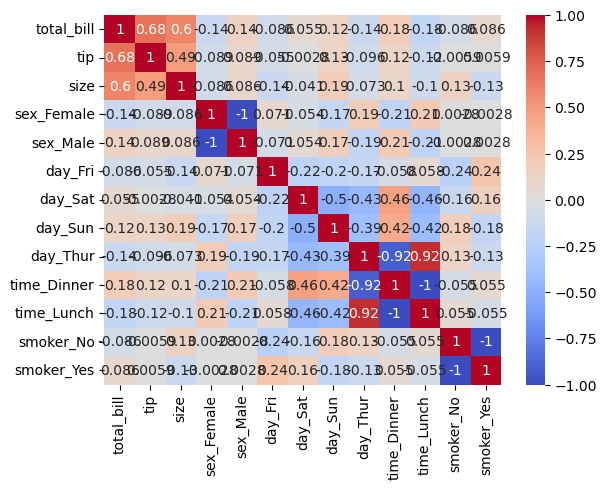

In [5]:
# correlation
df_corr = df.corr()
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm')


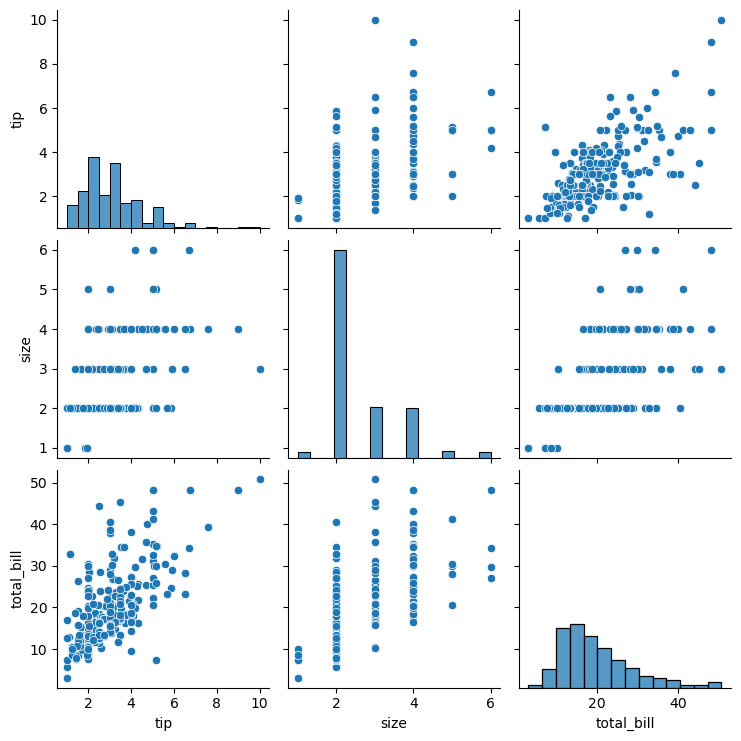

In [6]:
# pairplot 
sns.pairplot(df[["tip","size","total_bill"]])


In [7]:
# remove smoker
del df['smoker_No']
del df['smoker_Yes']
df.head()


,total_bill,tip,size,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,True,False,False,False,True,False,True,False
1,10.34,1.66,3,False,True,False,False,True,False,True,False
2,21.01,3.50,3,False,True,False,False,True,False,True,False
3,23.68,3.31,2,False,True,False,False,True,False,True,False
4,24.59,3.61,4,True,False,False,False,True,False,True,False


In [9]:
# set independent and dependent variables
X = df.drop('tip', axis = 1)
y = df['tip']

# split into testing/training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

# assign algorithm and train
model = LinearRegression()
model.fit(X_train, y_train)

# find y-intercept
model.intercept_


np.float64(0.8003830374428151)

In [10]:
# find x coefficients
model.coef_


array([ 0.10076136,  0.08948879,  0.01993134, -0.01993134,  0.13457362,
       -0.06788582, -0.1064135 ,  0.0397257 ,  0.03332708, -0.03332708])

In [11]:
# find mean absolute error
# comparing the training set actual tips (y_train) to the models predictions (x_train)
mae_train = mean_absolute_error(y_train, model.predict(X_train))
print('Training Set MAE: %2f' % mae_train)
# i.e. MAE = 0.76, if the tip was $5 the model prediction was off by $0.76


Training Set MAE: 0.761525


In [13]:
# comparing the testing set actual tips (y_test) to the models predictions (x_test)
mae_train = mean_absolute_error(y_test, model.predict(X_test))
print('Test Set MAE: %2f' % mae_train)


Test Set MAE: 0.701901


In [16]:
# predict data point
jamie = [
    30, # total bill
    2,  # size
    1,  # time_dinner
    0,  # time_lunch
    0,  # day_fri
    0,  # day_sat
    1,  # day_sun
    0,  # day_thur
    0,  # sex_female
    1,  # sex_male
]
jamie = model.predict([jamie])
jamie


/Users/kenneditodd/miniconda3/envs/jupyter/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.88239226])